# #Exploratory Data Analysis of Hotel Booking Data


Importing Important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# tells python to actually display the graphs
from sklearn.preprocessing import LabelEncoder # import lable encoder
import copy
import scipy.stats as stats

Read the dataframe

# #Understanding data

In [2]:
df_hbd = pd.read_csv("hotel_bookings.csv")

In [3]:
print("Top 4 rows of the data")
print(df_hbd.head(4))
print("")
print("Bottom 4 rows of the data")
print(df_hbd.tail(4))

Top 4 rows of the data
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                 

In [4]:
#Shape of the date

rows, coulmn = df_hbd.shape
print(f'Datataframe has {rows} rows and {coulmn} columns')

Datataframe has 119390 rows and 32 columns


In [5]:
#Data type of each attribute

df_hbd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Dataframe has 31 attributes

Presence of Missing Value

In [6]:
df_hbd.isnull().values.any()

True

In [7]:
df_hbd.isnull().sum().sum()

129425

Dataframe has 129425 null values

In [8]:
df_hbd.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### DataFrame have 4,488,16340,112593 missing values for Children, Country,Agent and Company respectively

## Data Cleaning

We are excluding the company feature due to high prevelance of null values

In [9]:
df_hbd.drop('company',inplace=True,axis=1)

#Filling Missing Values
Using Median for children and agent and  Mode for Country

In [10]:
df_hbd['children'] = df_hbd['children'].fillna(df_hbd['children'].median())


In [11]:
df_hbd['agent'] = df_hbd['agent'].fillna(df_hbd['agent'].median())

In [12]:
print(df_hbd['country'].mode())

0    PRT
Name: country, dtype: object


In [13]:
df_hbd['country'].fillna(df_hbd['country'].mode()[0], inplace=True)

In [14]:
df_hbd.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [15]:
df_hbd.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [16]:
df_hbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Trend Analysis

High Demand Month Trend Analysis

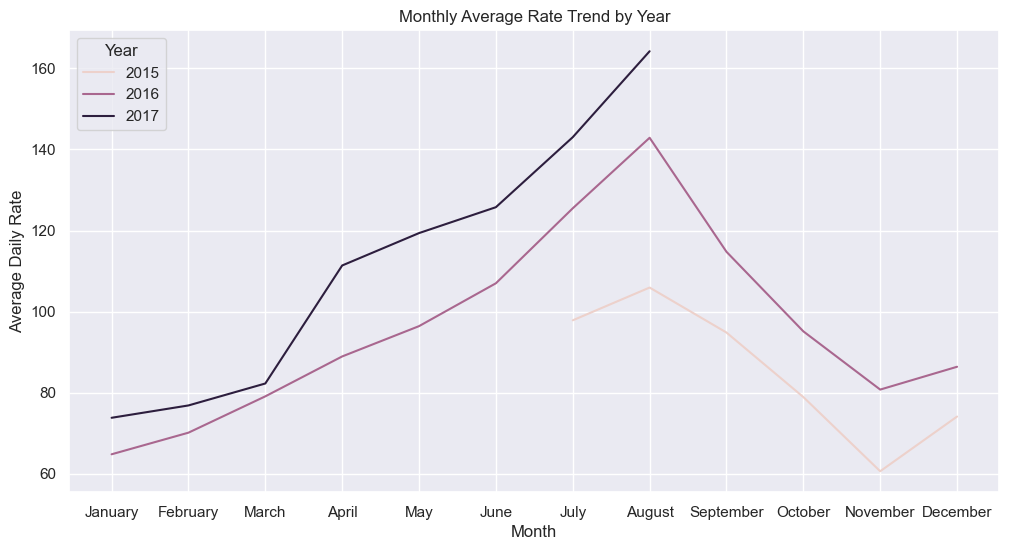

In [17]:
import calendar

# Extract unique months from the 'arrival_date_month' column
months_in_data = df_hbd['arrival_date_month'].unique()

# Sort the months in chronological order
month_order = list(calendar.month_name)[1:]  # Using [1:] to remove the empty string at the beginning
month_order = [month for month in month_order if month in months_in_data]

# Convert 'arrival_date_month' to a categorical type with the desired order
df_hbd['arrival_date_month'] = pd.Categorical(df_hbd['arrival_date_month'], categories=month_order, ordered=True)

# Trend analysis for monthly average rates with different colors for each year
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='arrival_date_month',
    y='adr',
    hue='arrival_date_year',
    data=df_hbd,
    hue_order=df_hbd['arrival_date_year'].unique(),
    errorbar=None  # Disable error bars for simplicity
)
plt.title('Monthly Average Rate Trend by Year')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.legend(title='Year', loc='upper left')
plt.show()

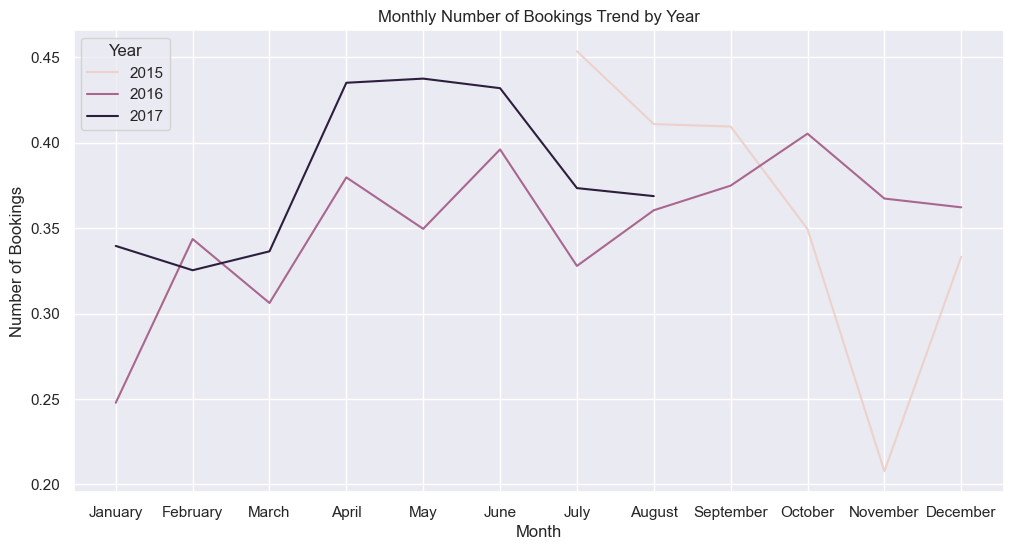

In [18]:
# Extract unique months from the 'arrival_date_month' column
months_in_data = df_hbd['arrival_date_month'].unique()

# Sort the months in chronological order
month_order = list(calendar.month_name)[1:]  # Using [1:] to remove the empty string at the beginning
month_order = [month for month in month_order if month in months_in_data]

# Convert 'arrival_date_month' to a categorical type with the desired order
df_hbd['arrival_date_month'] = pd.Categorical(df_hbd['arrival_date_month'], categories=month_order, ordered=True)

# Trend analysis for monthly number of bookings with different colors for each year
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='arrival_date_month',
    y='is_canceled',
    hue='arrival_date_year',
    data=df_hbd,
    hue_order=df_hbd['arrival_date_year'].unique(),
    errorbar=None  # Disable error bars for simplicity
)
plt.title('Monthly Number of Bookings Trend by Year')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(title='Year', loc='upper left')
plt.show()

# #We're checking when the hotel is busiest by looking at completed bookings (not cancellations). The code creates visualizations to highlight high-demand months and days. It's a quick way to see when the hotel is buzzing with activity.

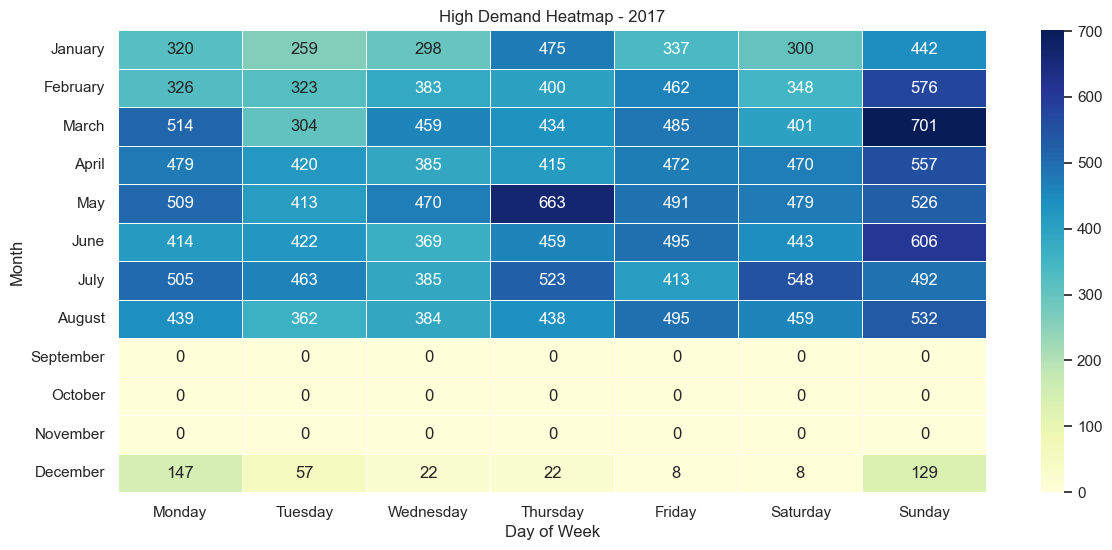

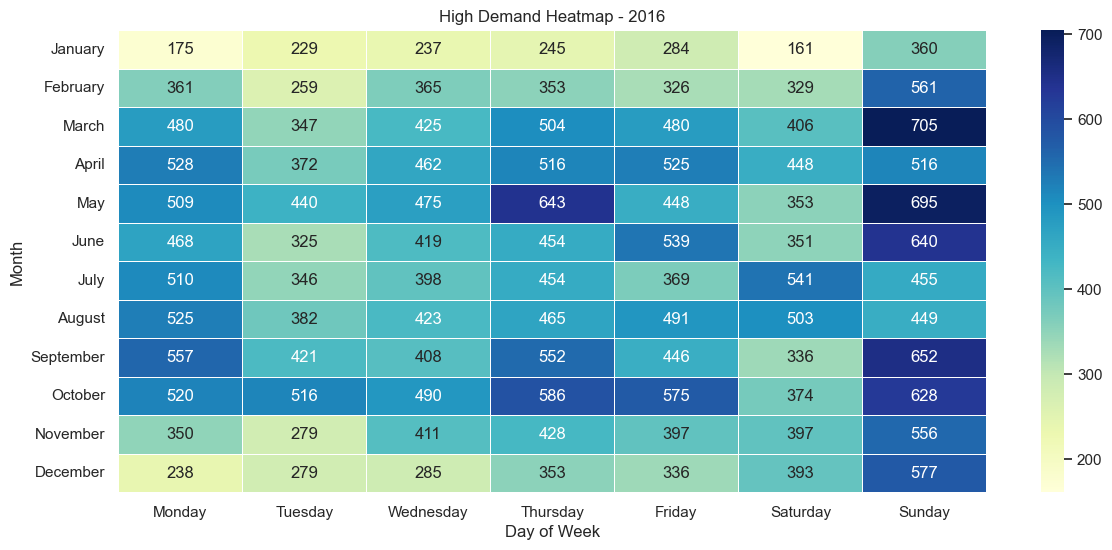

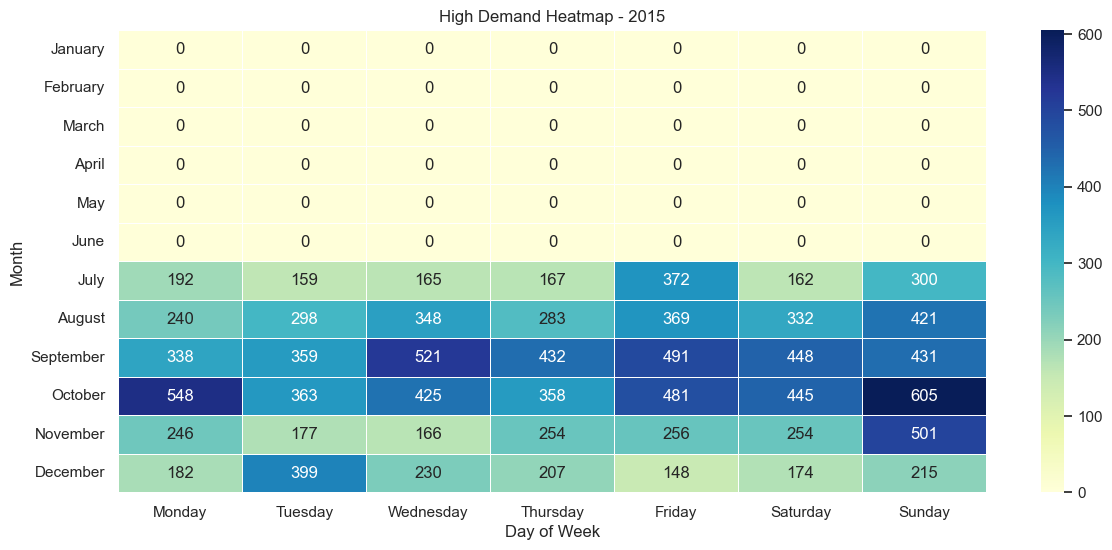

In [19]:
# Extract year from the 'reservation_status_date' column
df_hbd['reservation_status_date'] = pd.to_datetime(df_hbd['reservation_status_date'])
df_hbd['reservation_year'] = df_hbd['reservation_status_date'].dt.year

# Extract day of the week from the 'reservation_status_date' column
df_hbd['reservation_day_of_week'] = df_hbd['reservation_status_date'].dt.day_name()

# Define the logical order of days
day_order = list(calendar.day_name)

# Convert 'reservation_day_of_week' to categorical with logical order
df_hbd['reservation_day_of_week'] = pd.Categorical(df_hbd['reservation_day_of_week'], categories=day_order, ordered=True)

# Filter only non-canceled bookings
non_canceled_df = df_hbd[df_hbd['is_canceled'] == 0]

# Sort DataFrame by 'reservation_year' in descending order
non_canceled_df = non_canceled_df.sort_values(by='reservation_year', ascending=False)

# Create a separate heatmap for each year
for year in non_canceled_df['reservation_year'].unique():
    plt.figure(figsize=(14, 6))
    
    # Filter data for the specific year
    year_data = non_canceled_df[non_canceled_df['reservation_year'] == year]
    
    # Create a pivot table for heatmap
    pivot_table = year_data.pivot_table(index='arrival_date_month', columns='reservation_day_of_week', values='is_canceled', aggfunc='count', fill_value=0)
    
    # Plot heatmap
    sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
    plt.title(f'High Demand Heatmap - {year}')
    plt.xlabel('Day of Week')
    plt.ylabel('Month')
    plt.show()

## To pinpoint periods of low demand, we'll analyze canceled bookings to identify when the hotel experiences decreased activity.

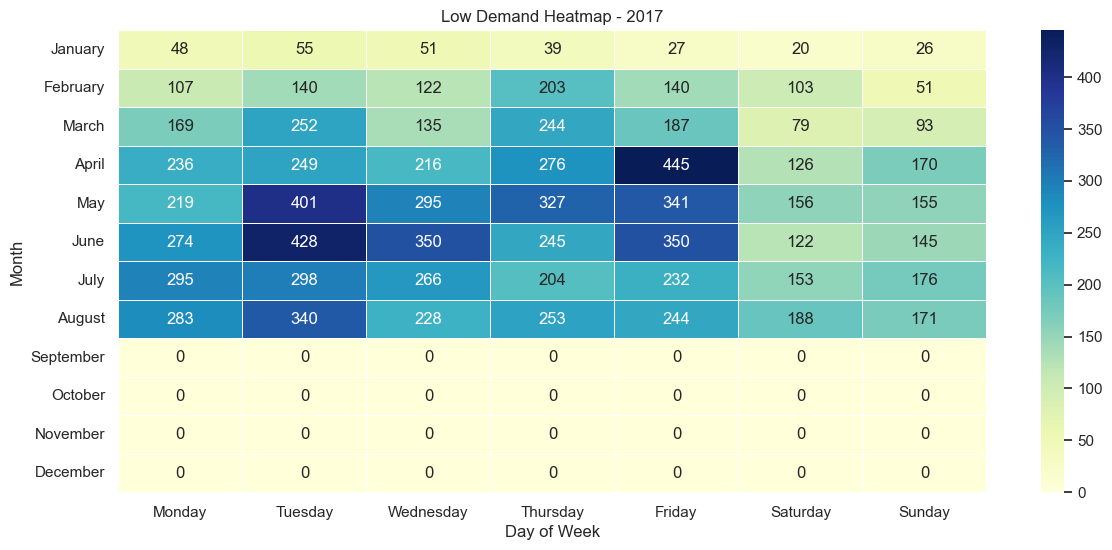

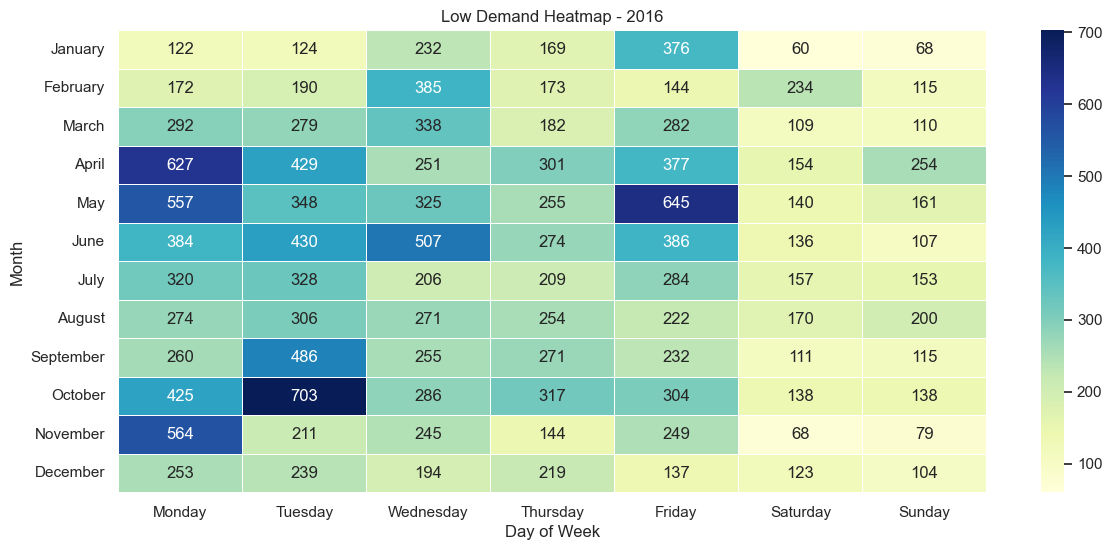

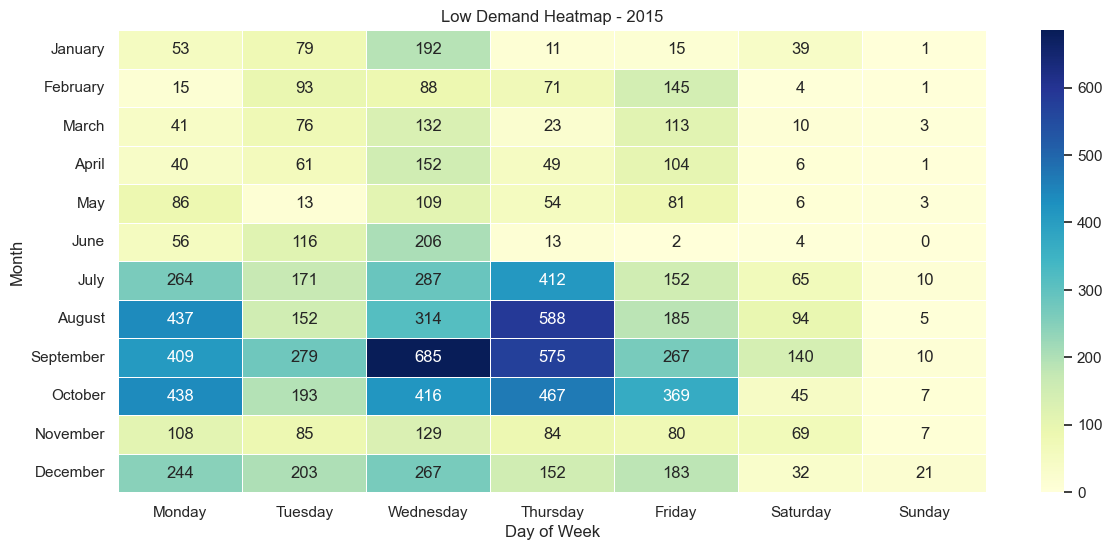

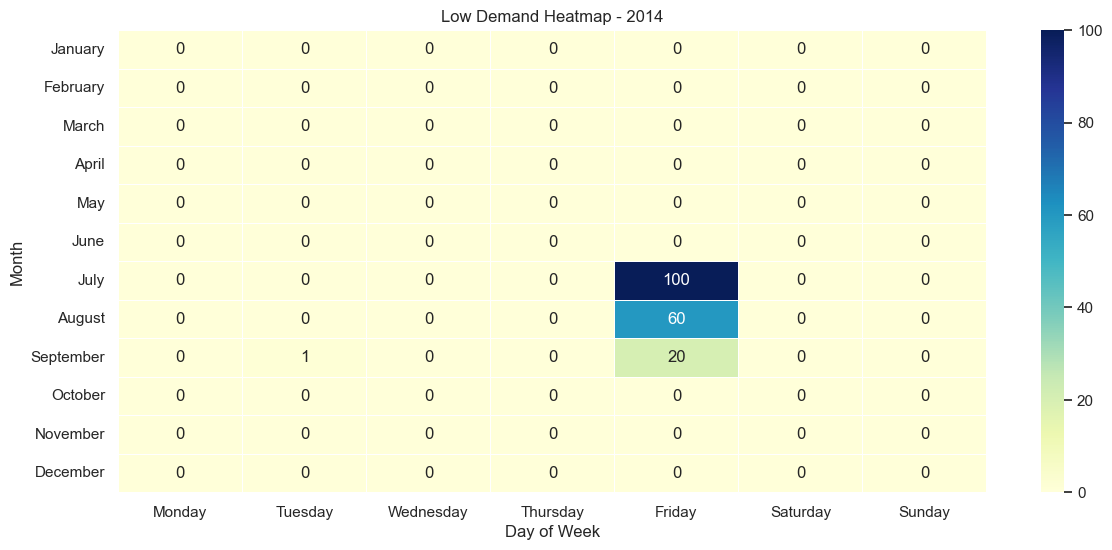

In [20]:
# Filter only canceled bookings
canceled_df = df_hbd[df_hbd['is_canceled'] == 1].copy()

# Convert 'reservation_status_date' to datetime
canceled_df['reservation_status_date'] = pd.to_datetime(canceled_df['reservation_status_date'])

# Extract year from the 'reservation_status_date' column
canceled_df['reservation_year'] = canceled_df['reservation_status_date'].dt.year

# Extract day of the week from the 'reservation_status_date' column
canceled_df['reservation_day_of_week'] = canceled_df['reservation_status_date'].dt.day_name()

# Define the logical order of days
day_order = list(calendar.day_name)

# Convert 'reservation_day_of_week' to categorical with logical order
canceled_df['reservation_day_of_week'] = pd.Categorical(canceled_df['reservation_day_of_week'], categories=day_order, ordered=True)

# Sort DataFrame by 'reservation_year' in descending order
canceled_df = canceled_df.sort_values(by='reservation_year', ascending=False)

# Create a separate heatmap for each year
for year in canceled_df['reservation_year'].unique():
    plt.figure(figsize=(14, 6))
    
    # Filter data for the specific year
    year_data = canceled_df[canceled_df['reservation_year'] == year]
    
    # Create a pivot table for heatmap
    pivot_table = year_data.pivot_table(index='arrival_date_month', columns='reservation_day_of_week', values='is_canceled', aggfunc='count', fill_value=0)
    
    # Plot heatmap
    sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
    plt.title(f'Low Demand Heatmap - {year}')
    plt.xlabel('Day of Week')
    plt.ylabel('Month')
    plt.show()

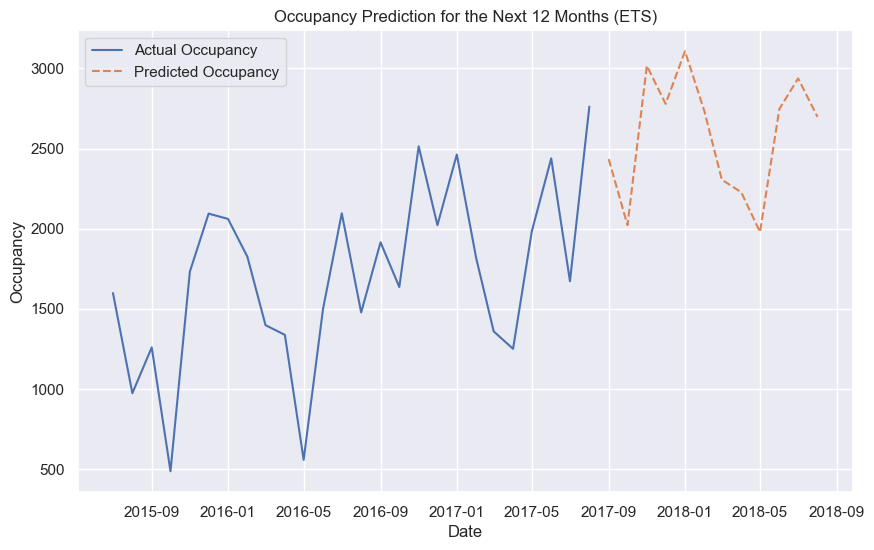

In [50]:
df= pd.read_csv('hotel_bookings.csv')
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming df.hbd is already loaded
# Preprocess the data
df['is_canceled'] = pd.to_numeric(df['is_canceled'], errors='coerce')
occupancy_data = df.groupby(['arrival_date_year', 'arrival_date_month']).agg({'is_canceled': 'sum'}).reset_index()

# Convert 'arrival_date_year' and 'arrival_date_month' to datetime
occupancy_data['ds'] = pd.to_datetime(occupancy_data[['arrival_date_year', 'arrival_date_month']].astype(str).agg('-'.join, axis=1), format='%Y-%B')

# Create a time series with 'ds' as the index
occupancy_ts = pd.Series(occupancy_data['is_canceled'].values, index=occupancy_data['ds'])

# Set a frequency for the time series index
occupancy_ts.index = pd.date_range(start=occupancy_ts.index.min(), end=occupancy_ts.index.max(), freq='MS')

# Fit Exponential Smoothing (ETS) model
ets_model = ExponentialSmoothing(occupancy_ts, trend='add', seasonal='add', seasonal_periods=12)
ets_result = ets_model.fit()

# Forecast for the next 12 months
forecast_steps = 12
forecast = ets_result.forecast(steps=forecast_steps)

# Extend the index for the forecast
forecast_index = pd.date_range(start=occupancy_ts.index.max() + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(occupancy_ts, label='Actual Occupancy')
plt.plot(forecast_index, forecast, label='Predicted Occupancy', linestyle='--')
plt.title('Occupancy Prediction for the Next 12 Months (ETS)')
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.legend()
plt.show()

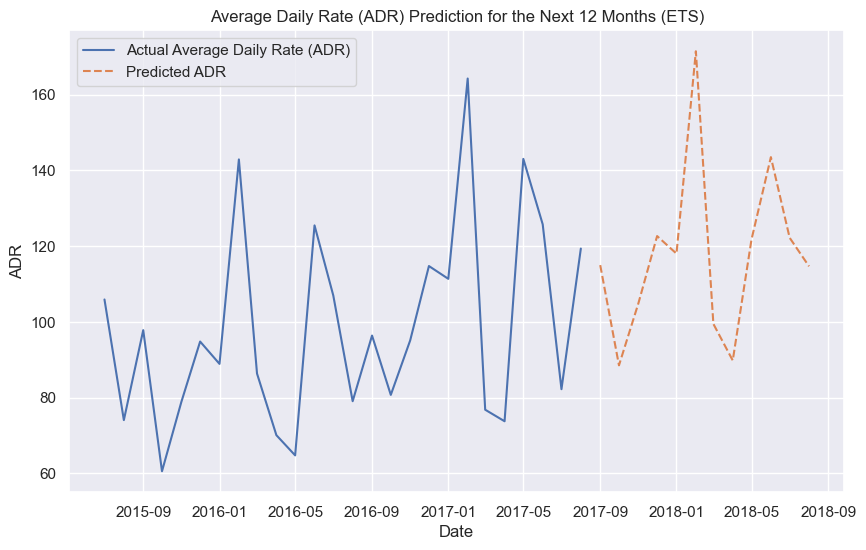

In [51]:
df['adr'] = pd.to_numeric(df['adr'], errors='coerce')
rate_data = df.groupby(['arrival_date_year', 'arrival_date_month']).agg({'adr': 'mean'}).reset_index()

# Convert 'arrival_date_year' and 'arrival_date_month' to datetime
rate_data['ds'] = pd.to_datetime(rate_data[['arrival_date_year', 'arrival_date_month']].astype(str).agg('-'.join, axis=1), format='%Y-%B')

# Create a time series with 'ds' as the index
rate_ts = pd.Series(rate_data['adr'].values, index=rate_data['ds'])

# Set a frequency for the time series index
rate_ts.index = pd.date_range(start=rate_ts.index.min(), end=rate_ts.index.max(), freq='MS')

# Fit Exponential Smoothing (ETS) model
ets_model_rate = ExponentialSmoothing(rate_ts, trend='add', seasonal='add', seasonal_periods=12)
ets_result_rate = ets_model_rate.fit()

# Forecast for the next 12 months
forecast_steps_rate = 12
forecast_rate = ets_result_rate.forecast(steps=forecast_steps_rate)

# Extend the index for the forecast
forecast_index_rate = pd.date_range(start=rate_ts.index.max() + pd.DateOffset(months=1), periods=forecast_steps_rate, freq='MS')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(rate_ts, label='Actual Average Daily Rate (ADR)')
plt.plot(forecast_index_rate, forecast_rate, label='Predicted ADR', linestyle='--')
plt.title('Average Daily Rate (ADR) Prediction for the Next 12 Months (ETS)')
plt.xlabel('Date')
plt.ylabel('ADR')
plt.legend()
plt.show()